In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import seaborn as sns
import pandas as pd

In [ ]:
x1 = np.random.normal(0, 1, 1000)
x2=x1+np.random.normal(0, 3, 1000)
x3=2*x1+x2
print(x1.shape,x2.shape,x3.shape)

(1000,) (1000,) (1000,)


In [ ]:
df=np.array([x1,x2,x3])
print(df.shape)
df

(3, 1000)


array([[ 1.3223704 ,  0.35477757, -1.64791712, ...,  1.34703055,
         1.0396886 , -1.10577946],
       [-0.35703458,  1.01723159,  4.54789018, ...,  2.21229458,
         3.04129807, -1.42098216],
       [ 2.28770623,  1.72678673,  1.25205594, ...,  4.90635568,
         5.12067526, -3.63254108]])

In [ ]:
np_cov = np.cov(df)
print(np_cov.shape)
print(np_cov)

(3, 3)
[[ 1.05399018  1.16577759  3.27375794]
 [ 1.16577759 10.63319739 12.96475256]
 [ 3.27375794 12.96475256 19.51226845]]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


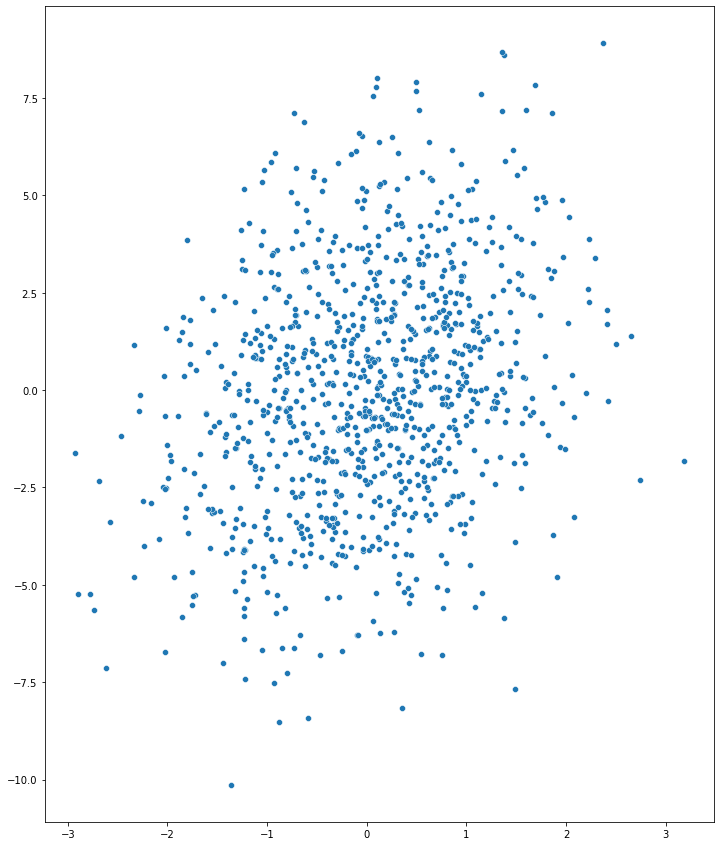

In [ ]:
sns.scatterplot(x1, x2
               );

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


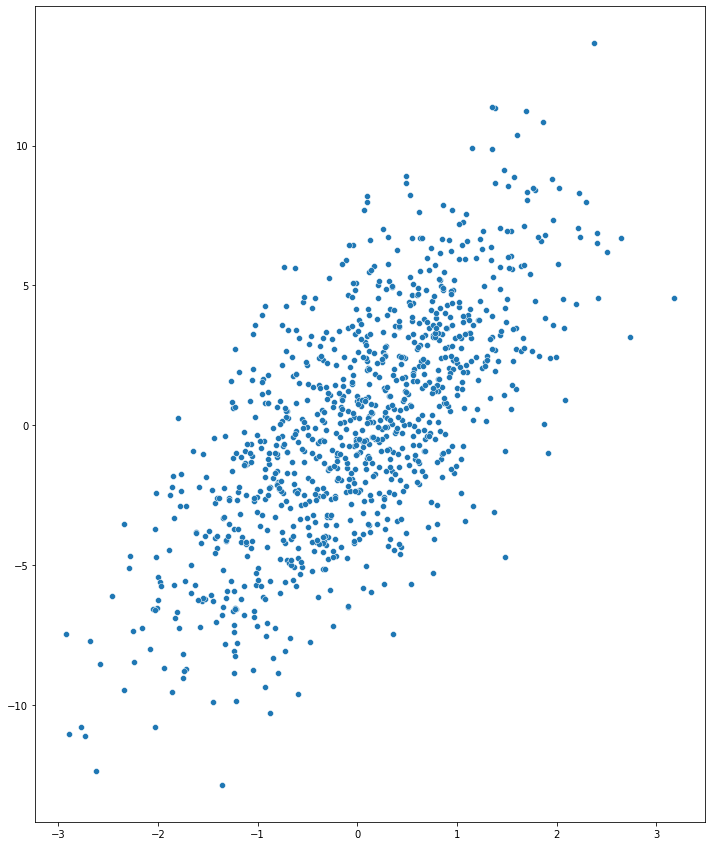

In [ ]:
sns.scatterplot(x1, x3
               );

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


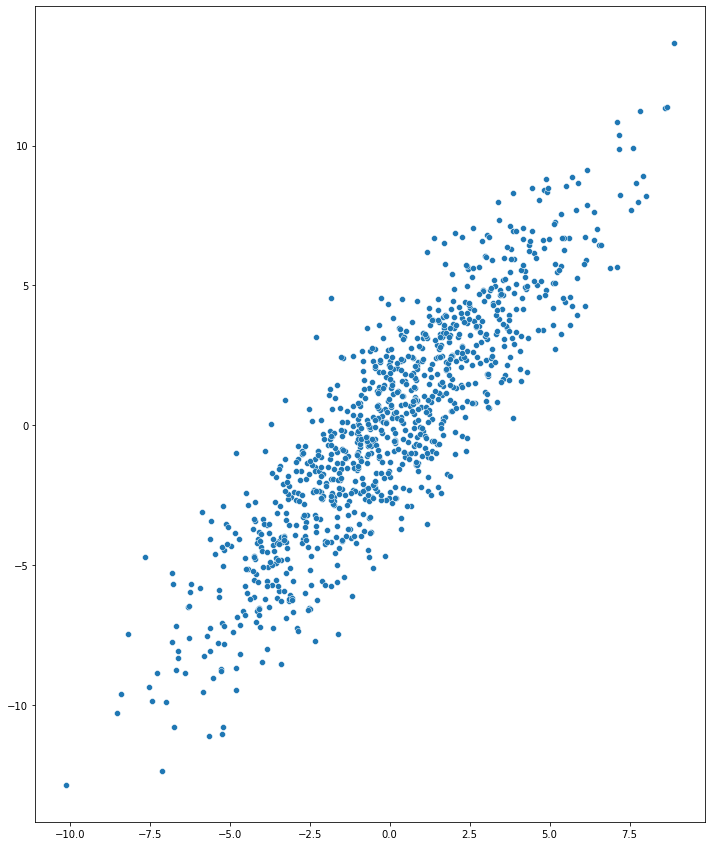

In [ ]:
sns.scatterplot(x2, x3
               );


In [ ]:
U, S, Vt = np.linalg.svd(df)
scale_factor = 3
# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(1000-1)
# The matrix U already contains the eigenvectors
V_svd = U
print(V_svd)
print(l_svd)

[[-0.11804986  0.56515269 -0.81649658]
 [-0.574118   -0.70973365 -0.40824829]
 [-0.81021772  0.42057173  0.40824829]]
[2.91779601e+01 2.02921995e+00 5.17648533e-31]


**Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix**

In [ ]:
l, v = la.eig(np_cov)
print('eigenvalues')
print(l)
print('realeigenvalues')
print(np.real_if_close(l))
print('eigenvectors')
print(v)

eigenvalues
[2.91740429e+01+0.j 4.46008184e-17+0.j 2.02541312e+00+0.j]
realeigenvalues
[2.91740429e+01 4.46008184e-17 2.02541312e+00]
eigenvectors
[[-0.11813024 -0.81649658  0.56513589]
 [-0.57401704 -0.40824829 -0.70981531]
 [-0.81027753  0.40824829  0.42045648]]


**Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result**

compare eginvectors in both approaches and they are the same;

In [ ]:
U, s, Vt = la.svd(np_cov)
print('u:',U)
print(np.real_if_close(s))
print('\n')
print('s:',s)
print('\n')
print(v)
print(v.T.shape)

u: [[-0.11322083  0.56613989 -0.81649658]
 [-0.5801561  -0.70480652 -0.40824829]
 [-0.80659776  0.42747327  0.40824829]]
[2.49416437e+01 2.01684374e+00 1.57394693e-16]


s: [2.49416437e+01 2.01684374e+00 1.57394693e-16]


[[-0.11322083 -0.81649658  0.56613989]
 [-0.5801561  -0.40824829 -0.70480652]
 [-0.80659776  0.40824829  0.42747327]]
(3, 3)


In [ ]:
print(l)
print(s)
Lambda = np.diag(l)
print(Lambda)
print(Lambda.trace())
print(np_cov.trace())

[2.49416437e+01+0.j 5.49563242e-16+0.j 2.01684374e+00+0.j]
[2.49416437e+01 2.01684374e+00 1.57394693e-16]
[[2.49416437e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 5.49563242e-16+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 2.01684374e+00+0.j]]
(26.958487404753637+0j)
26.95848740475364


In [ ]:
print(Lambda[0][0]/np_cov.trace())#first axes for pca
print(Lambda[0][0]/Lambda.trace())#first axes for pca


(0.9251870586362034+0j)
(0.9251870586362037+0j)


In [ ]:
print(np.real_if_close(Lambda[0][0]))
print(np.real_if_close(Lambda[1][1]+Lambda[0][0]))
print(Lambda[0][0])
print(Lambda[0][0]+Lambda[1][1]/np_cov.trace())#first axes for pca
print('first and second axes',np.real_if_close(Lambda[0][0]+Lambda[1][1]))
print('trace',np_cov.trace())
print(25.740803915776/27.753012580688488)
print(np.real_if_close(Lambda[1][1]+Lambda[0][0]+Lambda[2][2]))


24.94164366728516
24.94164366728516
(24.94164366728516+0j)
(24.94164366728516+0j)
first and second axes 24.94164366728516
trace 26.95848740475364
0.9274958471963273
26.958487404753637


In [ ]:
#for each eigenvalue calculate:
print(la[0][0]/la.trace())
print(la[1][1]/la.trace())
print(la[2][2]/la.trace())
np.real_if_close(la[2][2])
print(la.trace())
print(4.38403696e-15/27.753012580688498
)

TypeError: ignored

In [ ]:
la=np.diag(s)
print(la)
print(la.trace())
print(la[0][0]/la.trace())
print(la[0][0]+la[1][1])
print(la[0][0]+la[1][1]/la.trace())
print(25.813308068579666/27.753012580688498)
print(la[0][0]+la[1][1]+la[2][2],la.trace())
print(27.753012580688498/np_cov.trace())

[[2.49416437e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.01684374e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.57394693e-16]]
26.95848740475364
0.9251870586362037
26.95848740475364
25.01645660864896
0.9301083258450095
26.95848740475364 26.95848740475364
1.029472171936277


In [ ]:
print(v[0][0])


-0.11322082577456045


Eigenvalue: (29.174042891180758+0j) ,	eigenvector: [-0.11813024 -0.57401704 -0.81027753]
sld -0.11813024481939328
Eigenvalue: (4.4600818370712546e-17+0j) ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
sld -0.8164965809277267
Eigenvalue: (2.025413121357054+0j) ,	eigenvector: [ 0.56513589 -0.70981531  0.42045648]
sld 0.5651358939160055


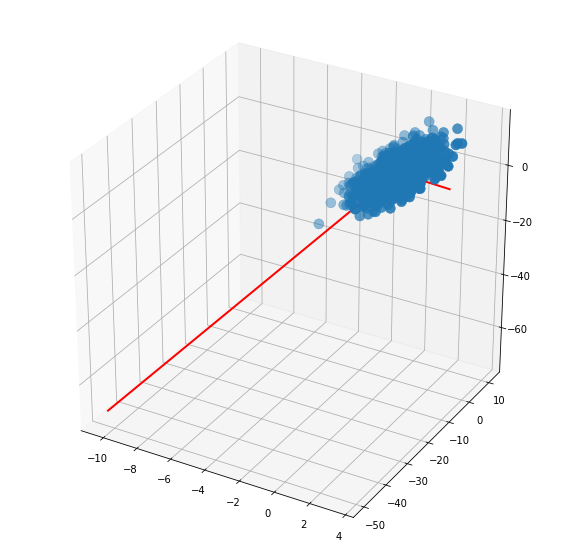

In [ ]:
ax = plt.axes(projection='3d')
plt.rcParams['figure.figsize'] = (10,10)
scale_factor = 3
ax.scatter(x1, x2, x3, linewidth=0.5,s=100);
for li, vi in zip(l,v.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    print("sld",vi[0])
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]],[0, scale_factor * li * vi[2]], 'r-', lw=2)


Eigenvalue: 29.177960131764372 ,	eigenvector: [-0.11804986 -0.574118   -0.81021772]
sld -0.11804985845074656
Eigenvalue: 2.029219951290241 ,	eigenvector: [ 0.56515269 -0.70973365  0.42057173]
sld 0.5651526910960363
Eigenvalue: 5.176485327852108e-31 ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
sld -0.8164965809277263


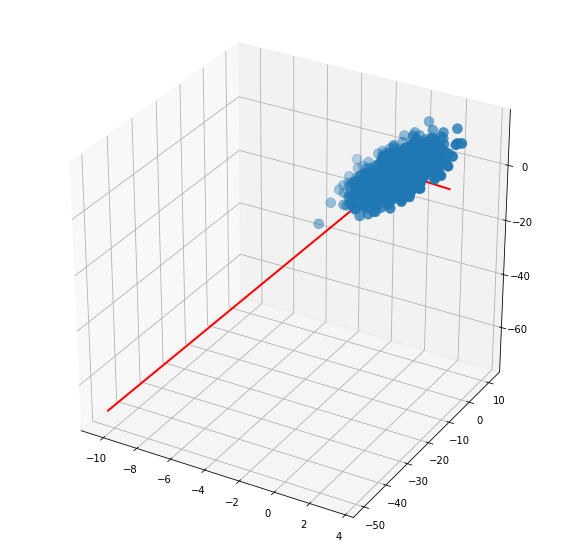

In [ ]:
ax = plt.axes(projection='3d')
plt.rcParams['figure.figsize'] = (10,10)
scale_factor = 3
ax.scatter(x1, x2, x3, linewidth=0.5,s=100);
for li, vi in zip(l_svd,V_svd.T ):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    print("sld",vi[0])
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]],[0, scale_factor * li * vi[2]], 'r-', lw=2)


In [ ]:
#select eigenvector according to largest eigen values
for li, vi in zip(l_svd,V_svd.T ):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
print(V_svd.T)
print(l_svd[2],l_svd[1])
print(l_svd[2]>l_svd[1])
#the bigest eigen values are 29.177960131764372 ,29.177960131764372 
#so the eigenvector are
print(V_svd.T[0,:],V_svd[1,:])
newd=np.array([V_svd.T[0,:],V_svd.T[1,:]])
print('------')
print(newd)
print('now compare')
print(v.T)

Eigenvalue: 29.177960131764372 ,	eigenvector: [-0.11804986 -0.574118   -0.81021772]
Eigenvalue: 2.029219951290241 ,	eigenvector: [ 0.56515269 -0.70973365  0.42057173]
Eigenvalue: 5.176485327852108e-31 ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
[[-0.11804986 -0.574118   -0.81021772]
 [ 0.56515269 -0.70973365  0.42057173]
 [-0.81649658 -0.40824829  0.40824829]]
5.176485327852108e-31 2.029219951290241
False
[-0.11804986 -0.574118   -0.81021772] [-0.574118   -0.70973365 -0.40824829]
------
[[-0.11804986 -0.574118   -0.81021772]
 [ 0.56515269 -0.70973365  0.42057173]]
now compare
[[-0.11813024 -0.57401704 -0.81027753]
 [-0.81649658 -0.40824829  0.40824829]
 [ 0.56513589 -0.70981531  0.42045648]]


Eigenvalue: 29.177960131764372 ,	eigenvector: [-0.11804986 -0.574118   -0.81021772]
sld -0.11804985845074656
Eigenvalue: 2.029219951290241 ,	eigenvector: [ 0.56515269 -0.70973365  0.42057173]
sld 0.5651526910960363
Eigenvalue: 5.176485327852108e-31 ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
sld -0.8164965809277263


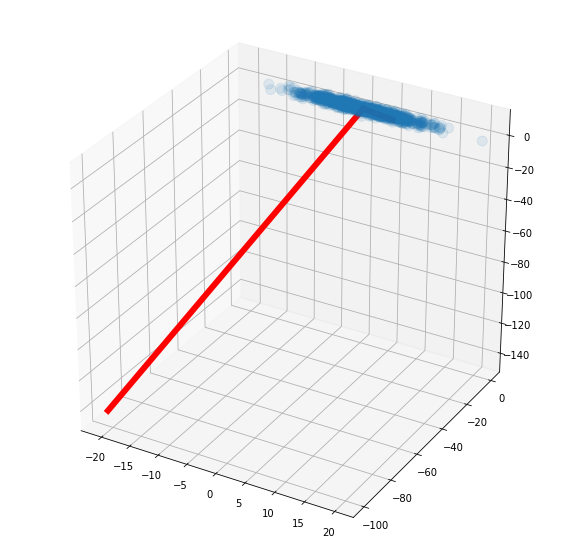

In [ ]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Xp = np.dot(v.T, df)
scale_factor=6
ax = plt.axes(projection='3d')
plt.rcParams['figure.figsize'] = (10,10)
ax.scatter(Xp[0,:], Xp[1,:],Xp[2,:], alpha=0.1,s=100)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l_svd,V_svd.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    print("sld",vi[0])
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]],[0, scale_factor * li * vi[2]], 'r-', lw=6)   

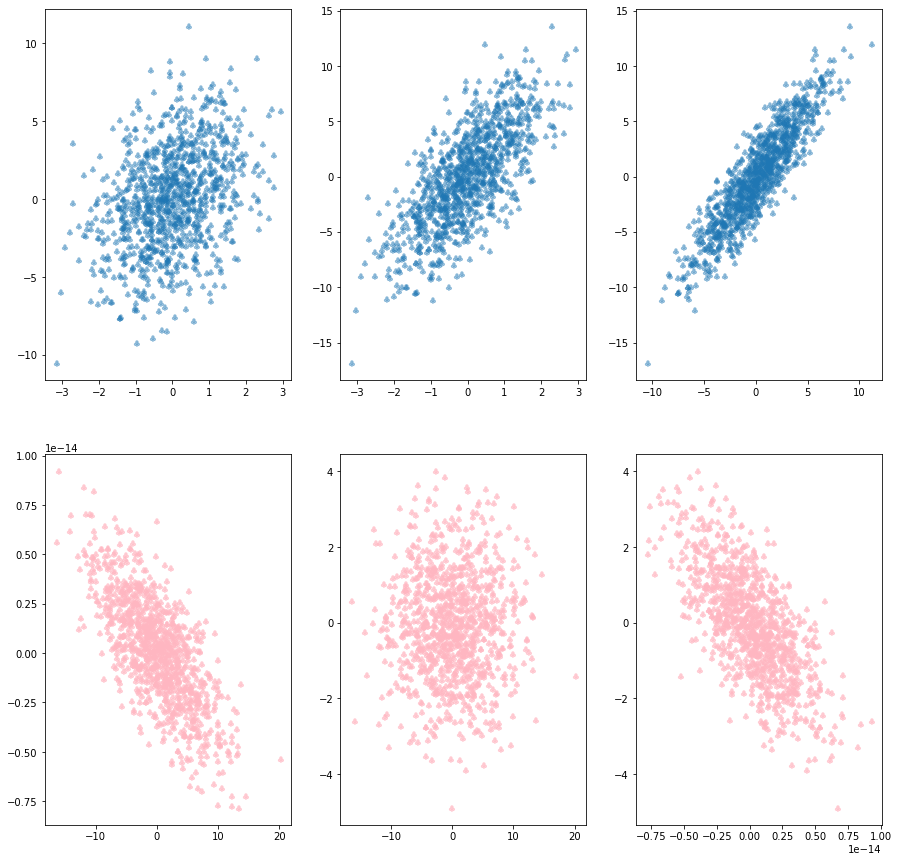

In [ ]:
#now we have new basis so we plot our data on this eigenvectors
new_ds=np.dot(v.T, df)
fig, axes = plt.subplots(2, 3, figsize=(15,15))
axes[0,0].scatter(df[0],df[1] ,alpha=0.4,marker=r'$\clubsuit$')
axes[0,1].scatter(df[0],df[2] ,alpha=0.4,marker=r'$\clubsuit$')
axes[0,2].scatter(df[1],df[2] ,alpha=0.4,marker=r'$\clubsuit$')
axes[1,0].scatter(new_ds[0],new_ds[1] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')
axes[1,1].scatter(new_ds[0],new_ds[2] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')
axes[1,2].scatter(new_ds[1],new_ds[2] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')

In [ ]:
#ex2
noises = np.random.normal(loc=0, scale=1/50, size=(3, 1000, 10))
x_noise = df + np.sum(noises, axis = 2)
print(x_noise.shape)

(3, 1000)


In [ ]:
U2, S2, Vt2 = np.linalg.svd(x_noise)
scale_factor = 3
# Rescale the SVD spectrum to get the eigenvalues
l_svd2 = S2**2/(1000-1)
# The matrix U already contains the eigenvectors
V_svd2 = U2
print(V_svd2)
print(l_svd2)

[[-0.11780204  0.56605422 -0.81590766]
 [-0.5742565  -0.709146   -0.40907386]
 [-0.81015563  0.42035054  0.40859916]]
[2.91856853e+01 2.03279291e+00 4.04406459e-03]


In [ ]:
l2, v2 = la.eig(np.cov(x_noise))
print('eigenvalues')
print(l2)
print('realeigenvalues')
print(np.real_if_close(l))
print('eigenvectors')
print(v2)

eigenvalues
[2.91818578e+01+0.j 4.04184095e-03+0.j 2.02912127e+00+0.j]
realeigenvalues
[2.91740429e+01 4.46008184e-17 2.02541312e+00]
eigenvectors
[[-0.11787761 -0.81588279  0.56607432]
 [-0.5741573  -0.40910729 -0.70920704]
 [-0.81021495  0.40861533  0.42022047]]


Eigenvalue: (29.181857771404903+0j) ,	eigenvector: [-0.11787761 -0.5741573  -0.81021495]
sld -0.11787760836639025
Eigenvalue: (0.0040418409546064136+0j) ,	eigenvector: [-0.81588279 -0.40910729  0.40861533]
sld -0.8158827942465829
Eigenvalue: (2.029121267592316+0j) ,	eigenvector: [ 0.56607432 -0.70920704  0.42022047]
sld 0.5660743197657073


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


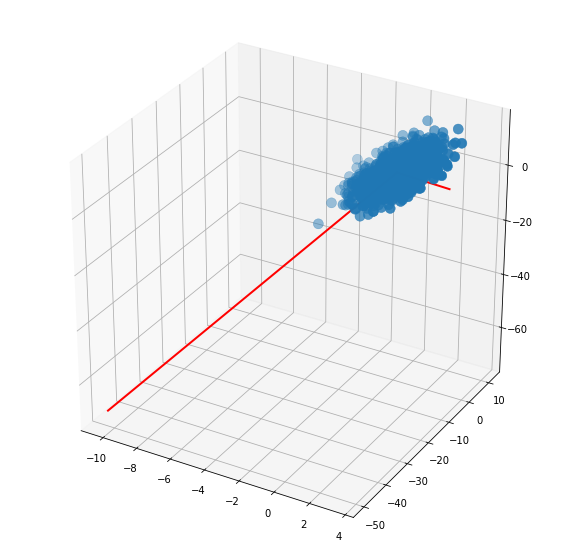

In [ ]:
ax = plt.axes(projection='3d')
plt.rcParams['figure.figsize'] = (10,10)
scale_factor = 3
ax.scatter(x_noise[0,:], x_noise[1,:], x_noise[2,:], linewidth=0.5,s=100);
for li, vi in zip(l2,v2.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    print("sld",vi[0])
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]],[0, scale_factor * li * vi[2]], 'r-', lw=2)

Eigenvalue: 29.18568527070104 ,	eigenvector: [-0.11780204 -0.5742565  -0.81015563]
sld -0.11780203614129758
Eigenvalue: 2.032792912878817 ,	eigenvector: [ 0.56605422 -0.709146    0.42035054]
sld 0.5660542173990318
Eigenvalue: 0.004044064591772921 ,	eigenvector: [-0.81590766 -0.40907386  0.40859916]
sld -0.8159076560774103


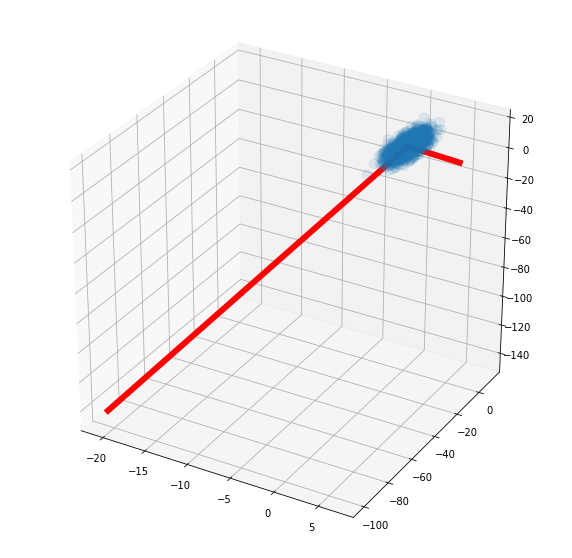

In [ ]:
Xp = np.dot(v.T, x_noise)
scale_factor=6
ax = plt.axes(projection='3d')
plt.rcParams['figure.figsize'] = (10,10)
ax.scatter(x_noise[0,:], x_noise[1,:],x_noise[2,:], alpha=0.1,s=100)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l_svd2,V_svd2.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    print("sld",vi[0])
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]],[0, scale_factor * li * vi[2]], 'r-', lw=6)  

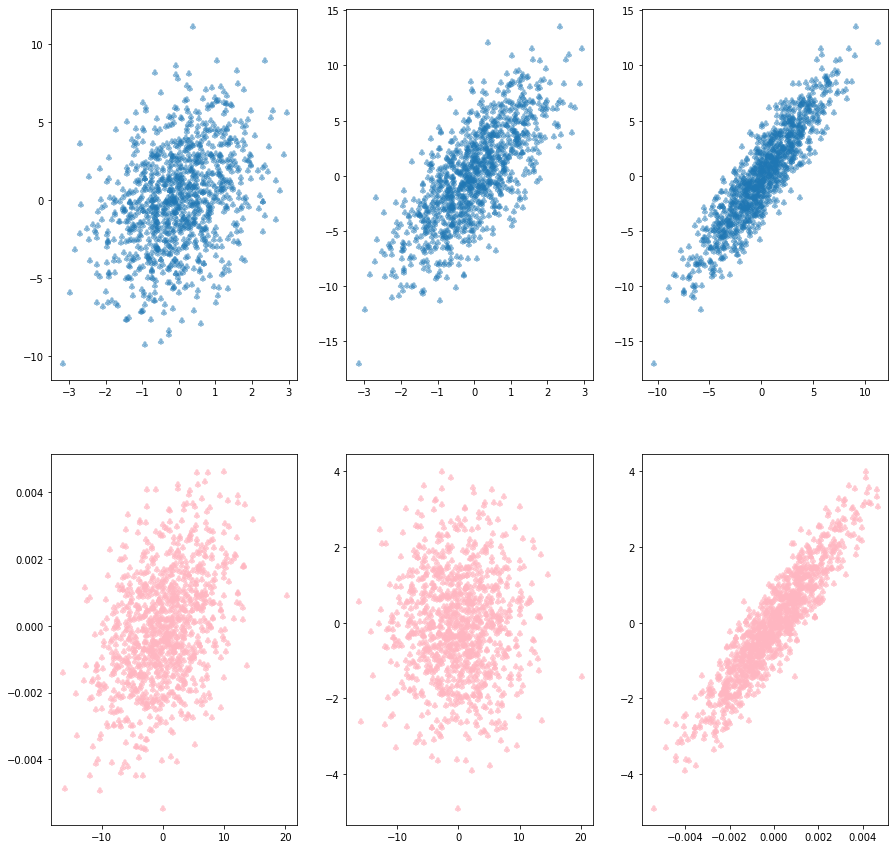

In [ ]:
new_noise=np.dot(v2.T, df)
fig, axes = plt.subplots(2, 3, figsize=(15,15))
axes[0,0].scatter(x_noise[0],x_noise[1] ,alpha=0.4,marker=r'$\clubsuit$')
axes[0,1].scatter(x_noise[0],x_noise[2] ,alpha=0.4,marker=r'$\clubsuit$')
axes[0,2].scatter(x_noise[1],x_noise[2] ,alpha=0.4,marker=r'$\clubsuit$')
axes[1,0].scatter(new_noise[0],new_noise[1] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')
axes[1,1].scatter(new_noise[0],new_noise[2] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')
axes[1,2].scatter(new_noise[1],new_noise[2] ,color="lightpink",alpha=0.6,marker=r'$\clubsuit$')

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-15 23:23:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data’

magic04.data        100%[===================>]   1.41M  3.61MB/s    in 0.4s    

2023-01-15 23:23:39 (3.61 MB/s) - ‘data/magic04.data’ saved [1477391/1477391]

--2023-01-15 23:23:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: ‘data/magic04.names’

magic04.names       100%[===================>]   5.27K  --.-K

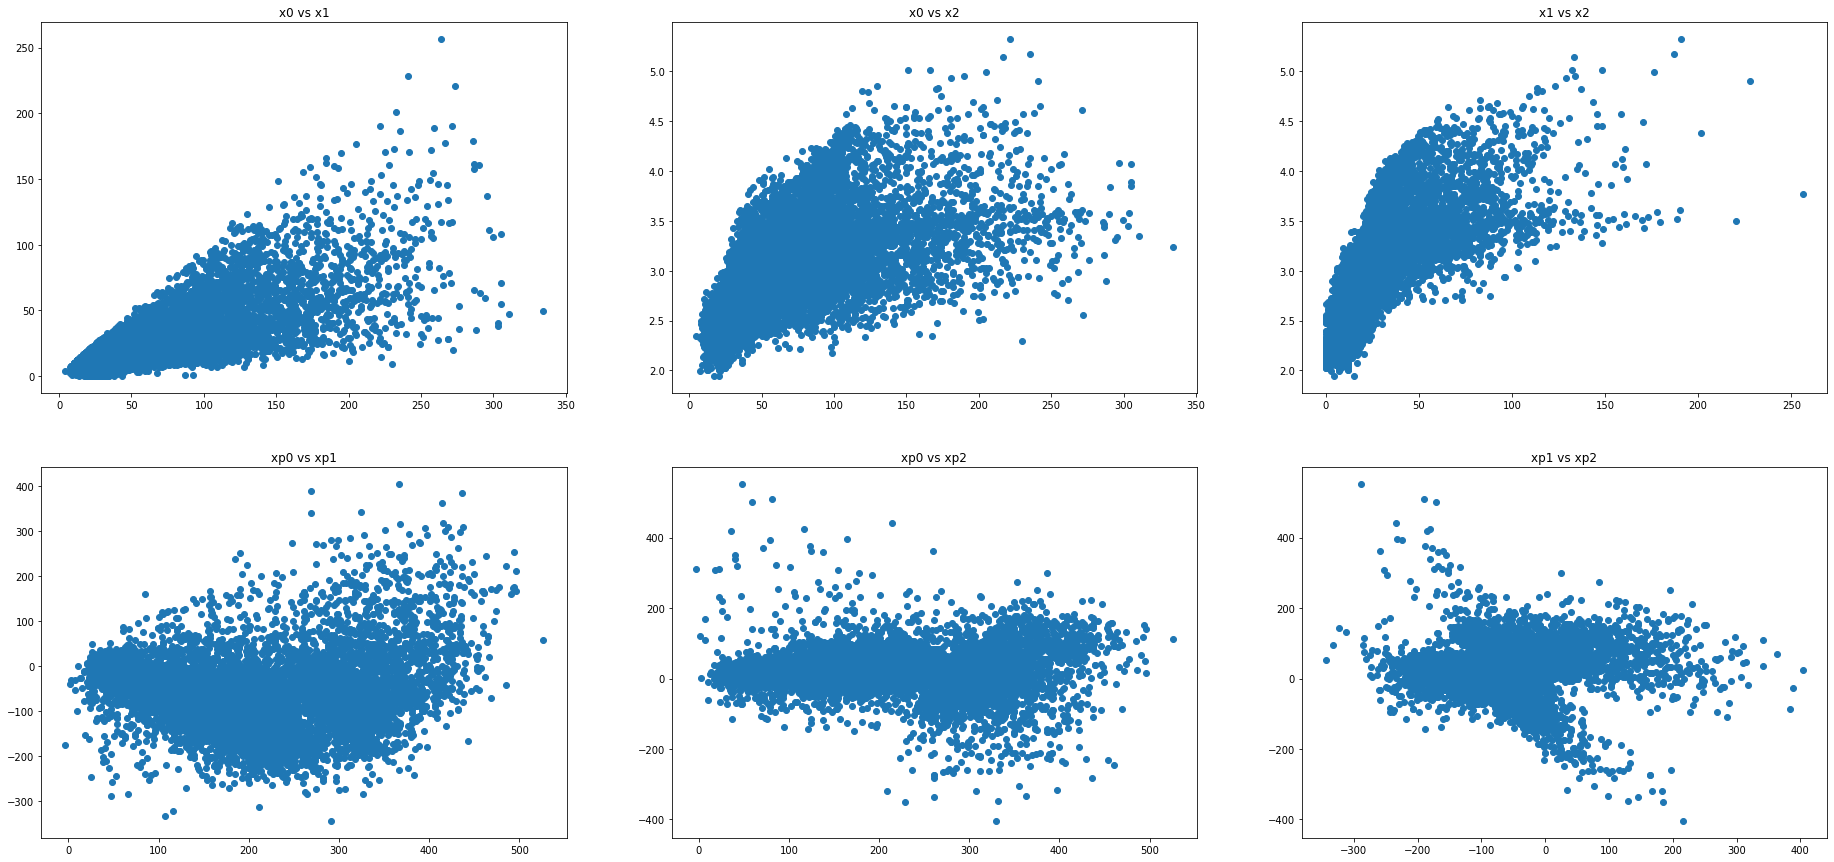

In [ ]:
#ex3
import pandas as pd

dataset = pd.read_csv("data/magic04.data",header = None)

dataset=dataset.iloc[:,:10] ## to compute the covariance i need to get rid of the last column which has not numeric number values
covariance = dataset.cov()

l, v = la.eig(covariance)
l = np.real_if_close(l)
xp = np.dot(v.T,dataset.T)

fig, axs = plt.subplots(2,3,figsize=(32,15))
axs[0][0].set_title("x0 vs x1")
axs[0][0].scatter(dataset.iloc[:,0],dataset.iloc[:,1])
axs[0][1].set_title("x0 vs x2")
axs[0][1].scatter(dataset.iloc[:,0],dataset.iloc[:,2])
axs[0][2].set_title("x1 vs x2")
axs[0][2].scatter(dataset.iloc[:,1],dataset.iloc[:,2])

axs[1][0].set_title("xp0 vs xp1")
axs[1][0].scatter(xp[0,:],xp[1,:])
axs[1][1].set_title("xp0 vs xp2")
axs[1][1].scatter(xp[0,:],xp[2,:])
axs[1][2].set_title("xp1 vs xp2")
axs[1][2].scatter(xp[1,:],xp[2,:])

plt.show()


ex3 optional


In [7]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-18 14:21:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data.1’

magic04.data.1      100%[===================>]   1.41M  1.52MB/s    in 0.9s    

2023-01-18 14:21:45 (1.52 MB/s) - ‘data/magic04.data.1’ saved [1477391/1477391]

--2023-01-18 14:21:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: ‘data/magic04.names.1’

magic04.names.1     100%[===================>]   5.27K 

In [16]:
file_name="/content/data/magic04.data"
head="/content/data/magic04.names"
df=pd.read_csv(file_name, names=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist"])
cov_m=np.cov(df.iloc[:,:-2].T)
l, V = la.eig(cov_m)
#PCA 
dataPCA=np.dot(V.T, df.iloc[:,:-2].T)

dataPCA

array([[-3.10206467e+01, -3.31600499e+01, -4.95325830e+01, ...,
        -6.92798471e+00,  5.47923993e+01,  2.36817194e+02],
       [-8.72804643e-02,  6.05273914e+00, -1.23221029e+02, ...,
         3.64653661e+01, -9.11060372e+01, -6.26122390e+01],
       [ 4.30126412e+01,  9.68134151e+00,  7.19030957e+01, ...,
         3.70766493e+01,  7.41590008e+01,  3.29074226e+01],
       ...,
       [ 2.07501156e+00,  1.82593506e+00,  1.34620424e+00, ...,
         2.18075225e+00,  2.56370250e+00,  2.27363239e+00],
       [ 1.37284614e+00,  1.54190141e+00,  1.48528531e+00, ...,
         1.40053099e+00,  1.53506401e+00,  1.44031562e+00],
       [ 1.11245838e-01,  3.56884206e-02,  9.62216020e-02, ...,
         1.12113875e-01,  8.57390373e-02,  1.03821657e-01]])